# Cleaning of Dataset

### Read Data

In [1]:
london_weekday <- read.csv('Data/london_weekdays.csv')
#london_weekend <- read.csv('data/london_weekends.csv')

In [2]:
str(london_weekday)
# 4614 observations

'data.frame':	4614 obs. of  20 variables:
 $ X                         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ realSum                   : num  570 298 337 227 256 ...
 $ room_type                 : Factor w/ 3 levels "Entire home/apt",..: 1 2 2 2 2 2 2 2 2 1 ...
 $ room_shared               : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ room_private              : Factor w/ 2 levels "False","True": 1 2 2 2 2 2 2 2 2 1 ...
 $ person_capacity           : num  2 2 2 2 3 2 2 2 4 3 ...
 $ host_is_superhost         : Factor w/ 2 levels "False","True": 1 2 1 2 1 1 1 1 1 1 ...
 $ multi                     : int  0 1 1 1 0 0 0 1 1 0 ...
 $ biz                       : int  0 0 0 0 0 0 0 0 0 1 ...
 $ cleanliness_rating        : num  10 10 10 10 9 10 10 10 9 8 ...
 $ guest_satisfaction_overall: num  98 99 96 99 98 100 100 95 93 74 ...
 $ bedrooms                  : int  1 1 1 1 1 1 1 1 1 0 ...
 $ dist                      : num  5.3 2.2 2.32 5.71 3.26 ...
 $ metro_dist                :

### Visualise Data
Note that data seems skewed, hence apply log transformation

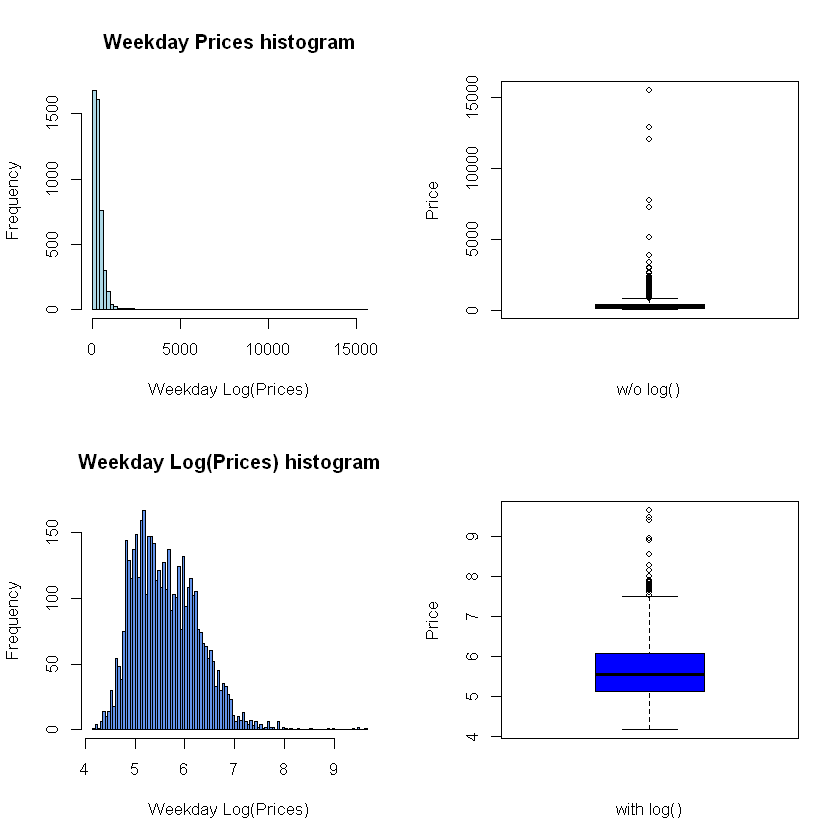

In [3]:
par(mfrow=c(2,2))

#Weekday: Without log transform
price_weekday <- london_weekday$realSum

#Historgram
hist(price_weekday, col = "lightblue"
, xlab = "Weekday Log(Prices)"
, main = 'Weekday Prices histogram',breaks=80)

#Boxplot
boxplot(price_weekday, col = "blue", ylab = "Price", xlab = "w/o log()")

#Weekday: With log transform
l_price_weekday <- log(london_weekday$realSum)

#Histogram
hist(l_price_weekday, col = "cornflowerblue"
, xlab = "Weekday Log(Prices)"
, main = 'Weekday Log(Prices) histogram',breaks=80)

#Boxplot
boxplot(l_price_weekday, col = "blue", ylab = "Price", xlab = "with log()")

#Weekend: Without log transform
#price_weekend <- london_weekend$realSum
#hist(price_weekend, col = "lightblue"
#, xlab = "Weekend Log(Prices)"
#, main = 'Weekend Prices histogram',breaks=80)

#Weekend: With log transform
#l_price_weekend <- log(london_weekend$realSum)
#hist(l_price_weekend, col = "cornflowerblue"
#, xlab = "Weekend Log(Prices)"
#, main = 'Weekend Log(Prices) histogram',breaks=80)

### Remove Outliers
Note that even after log transformation is applied, some outliers exist. The outliers are mainly due to the entire appartment listings being of a much higher price than the private and shared appartments. Hence, we focus on the prices of the private and share appartments only, and remove outliers that that are outside the 1.5*IQR range

In [4]:
#Shows the room_type with the highest prices
outlierprices <- london_weekday[order(london_weekday$realSum,decreasing=TRUE),]
head(outlierprices,n=20)

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1887,1886,15499.894,Entire home/apt,False,False,3,True,0,1,10,95,3,0.2691010,0.2271933,1100.3917,76.48945,2358.3585,42.228377,-0.13038,51.50995
3168,3167,12886.239,Entire home/apt,False,False,6,False,0,0,10,100,2,2.9383263,0.6197170,386.7318,26.88216,781.5264,13.993882,-0.14658,51.53190
3484,3483,12886.239,Private room,False,True,2,False,0,0,7,80,1,5.6234608,0.4855537,233.7668,16.24939,444.0518,7.951117,-0.04987,51.49397
1379,1378,12076.954,Private room,False,True,2,False,0,0,8,89,3,4.3035316,0.7090280,318.8115,22.16094,666.0130,11.925519,-0.18071,51.48849
4123,4122,7759.355,Entire home/apt,False,False,6,False,0,0,10,100,3,1.7091286,0.2964712,626.7365,43.56515,1012.5754,18.131008,-0.13984,51.49503
3535,3534,7223.829,Entire home/apt,False,False,4,True,0,0,9,98,2,0.4763776,0.2497076,1098.1663,76.33476,1374.4535,24.610738,-0.12335,51.50492
1892,1891,5166.631,Private room,False,True,3,True,0,1,10,99,2,0.3674286,0.1291938,973.0211,67.63577,2434.7544,43.596309,-0.13217,51.50989
1802,1801,3874.974,Entire home/apt,False,False,2,False,1,0,10,100,2,7.6789488,0.5172337,175.5451,12.20234,377.1586,6.753339,-0.01795,51.49898
155,154,3413.768,Entire home/apt,False,False,4,True,0,0,10,100,2,4.8419929,0.3337938,268.6595,18.67482,639.1557,11.444616,-0.19700,51.51200
4465,4464,3000.071,Entire home/apt,False,False,6,False,0,1,10,100,3,4.0718988,0.5306749,364.1388,25.31169,738.4377,13.222343,-0.18486,51.50069


#### Filter data structure to include private and share rooms only

In [5]:
london_weekday_private_shared <- subset(london_weekday, (london_weekday$room_type=='Private room' | london_weekday$room_type=='Shared room'))
#london_weekend_private_shared <- subset(london_weekend, (london_weekend$room_type=='Private room' | london_weekend$room_type=='Shared room'))

#### Function to find lower and upper quartiles to remove outliers

In [6]:
outlierData <- function(data){
    quartiles <- quantile(data, probs=c(.25, .75), na.rm = FALSE)    
    IQR <- IQR(data)
    Lower <- quartiles[1] - 1.5*IQR
    Upper <- quartiles[2] + 1.5*IQR 
    output <- list(Lower, Upper)
    return (output)}

In [7]:
weekday_outlier <- outlierData(london_weekday_private_shared$realSum)
#weekend_outlier <- outlierData(london_weekend_private_shared$realSum)

In [8]:
#Remove outliers from dataset
london_weekday_cleaned <- subset(london_weekday_private_shared, 
                                      realSum > weekday_outlier[1] &
                                       realSum < weekday_outlier[2])
#london_weekend_cleaned <- subset(london_weekend_private_shared, 
#                                      realSum > weekend_outlier[1] &
#                                       realSum < weekend_outlier[2])

### Plot before and after removal of outliers

#### Histogram

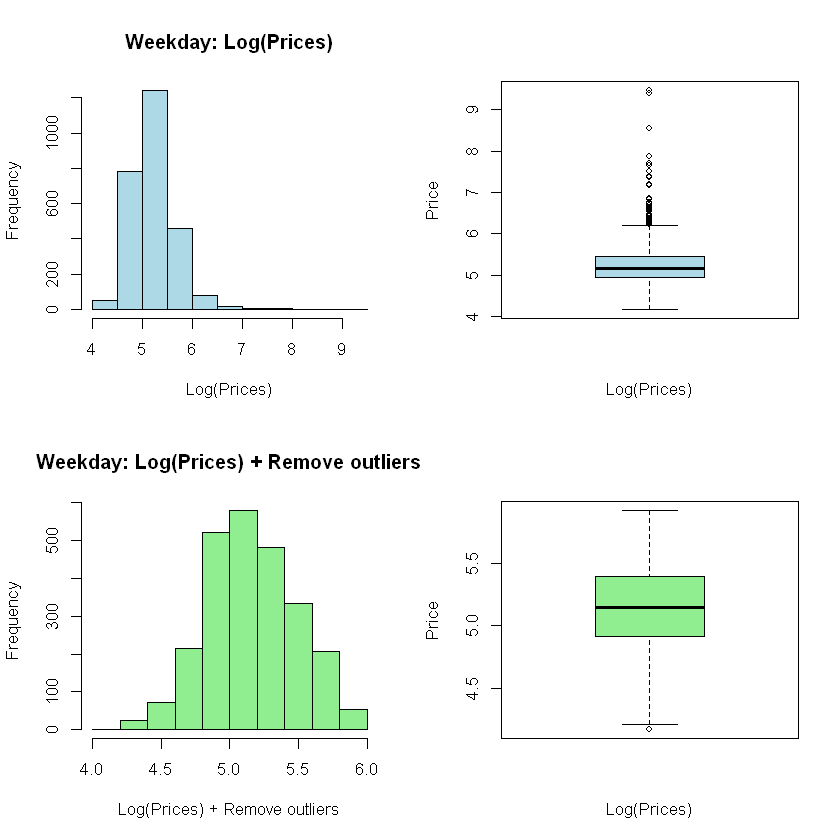

In [9]:
par(mfrow=c(2,2))
#Weekday: With log transform 
price_weekday <- log(london_weekday_private_shared$realSum)

#Histogram
hist(price_weekday, col = "lightblue"
, xlab = "Log(Prices)"
, main = 'Weekday: Log(Prices)',breaks=10)

#Boxplot
boxplot(price_weekday, col = "lightblue", xlab = "Log(Prices)", ylab = "Price" )

#Weekday: With log transform + remove outliers
price_weekday_cleaned <- log(london_weekday_cleaned$realSum)
hist(price_weekday_cleaned, col = "lightgreen"
, xlab = "Log(Prices) + Remove outliers"
, main = 'Weekday: Log(Prices) + Remove outliers',breaks=10)

#Boxplot
boxplot(price_weekday_cleaned, col = "lightgreen", xlab = "Log(Prices)", ylab = "Price" )



### Cleaning other variables

#### Host is superhost, host_is_superhost

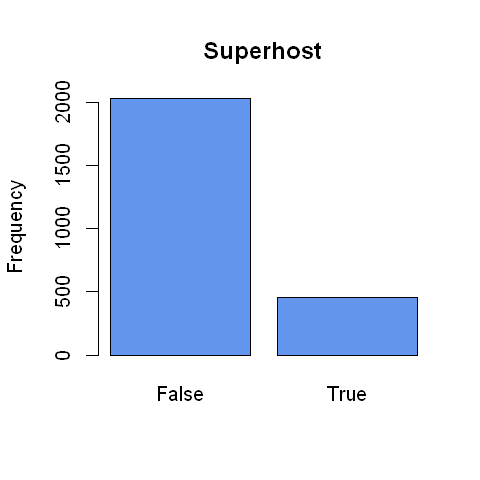

In [10]:
#Categorical data
library(repr)
options(repr.plot.width = 4, repr.plot.height = 4)
barplot(table(london_weekday_cleaned$host_is_superhost), main = "Superhost", col = "cornflowerblue",ylab='Frequency')
#nrow(subset(london_weekday_cleaned, london_weekday_cleaned$host_is_superhost == FALSE))

#### Multi, multi 

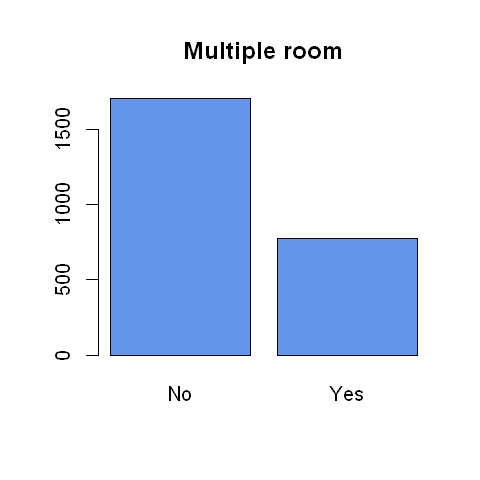

In [11]:
#Categorical data
library(repr)
options(repr.plot.width = 4, repr.plot.height = 4)
barplot(table(london_weekday_cleaned$multi), main = "Multiple room", col = "cornflowerblue", names.arg = c("No", "Yes"))

#### Cleanliness rating, cleanliness_rating

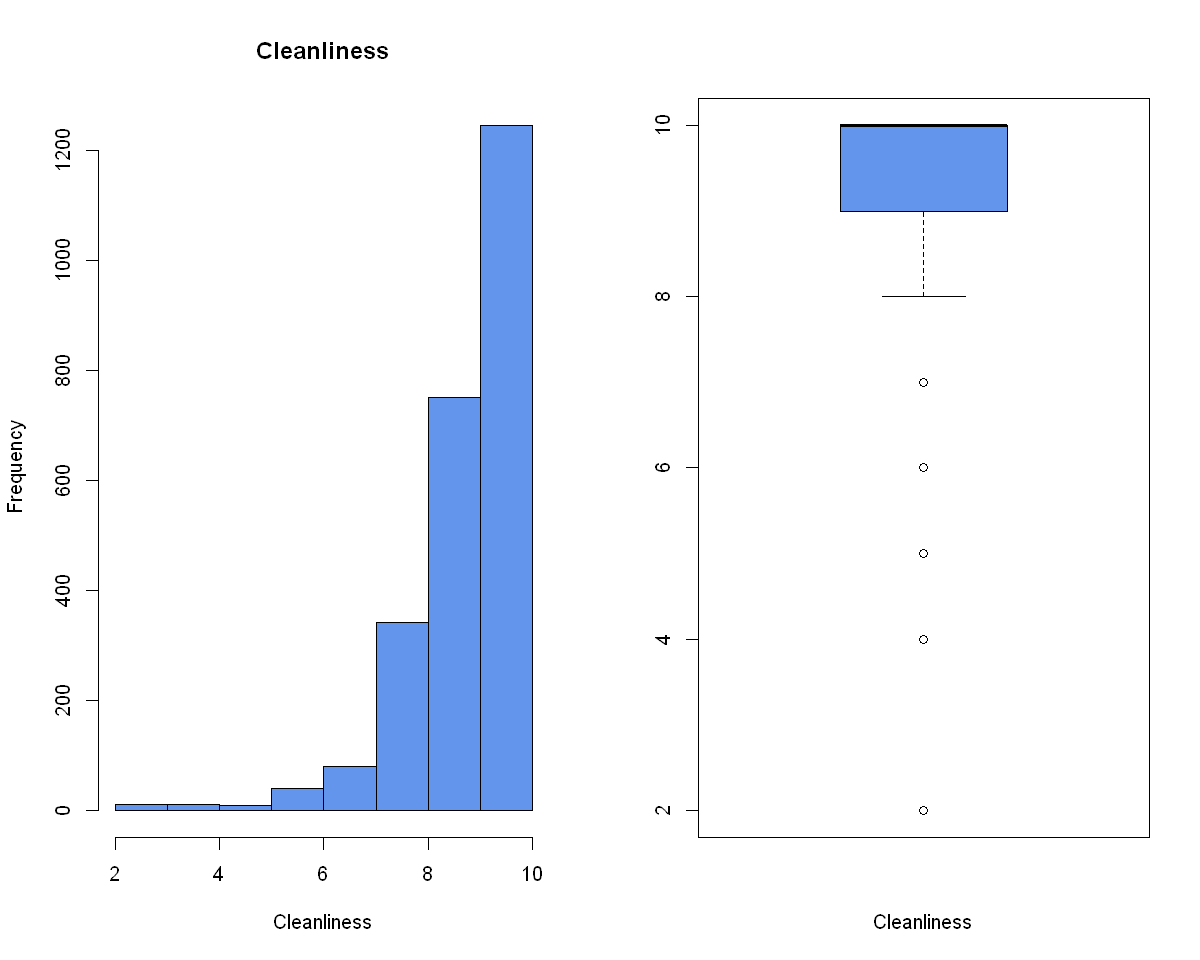

In [12]:
par(mfrow=c(1,2))
library(repr)
options(repr.plot.width = 10, repr.plot.height = 8)
#Person capacity without log()
#Histogram
hist(london_weekday_cleaned$cleanliness_rating, xlab = "Cleanliness", col = "cornflowerblue", main = "Cleanliness",breaks=10)

#boxplot
boxplot(london_weekday_cleaned$cleanliness_rating, xlab = "Cleanliness", col = "cornflowerblue")

#### Guest satisfaction, guest_satisfaction_overall

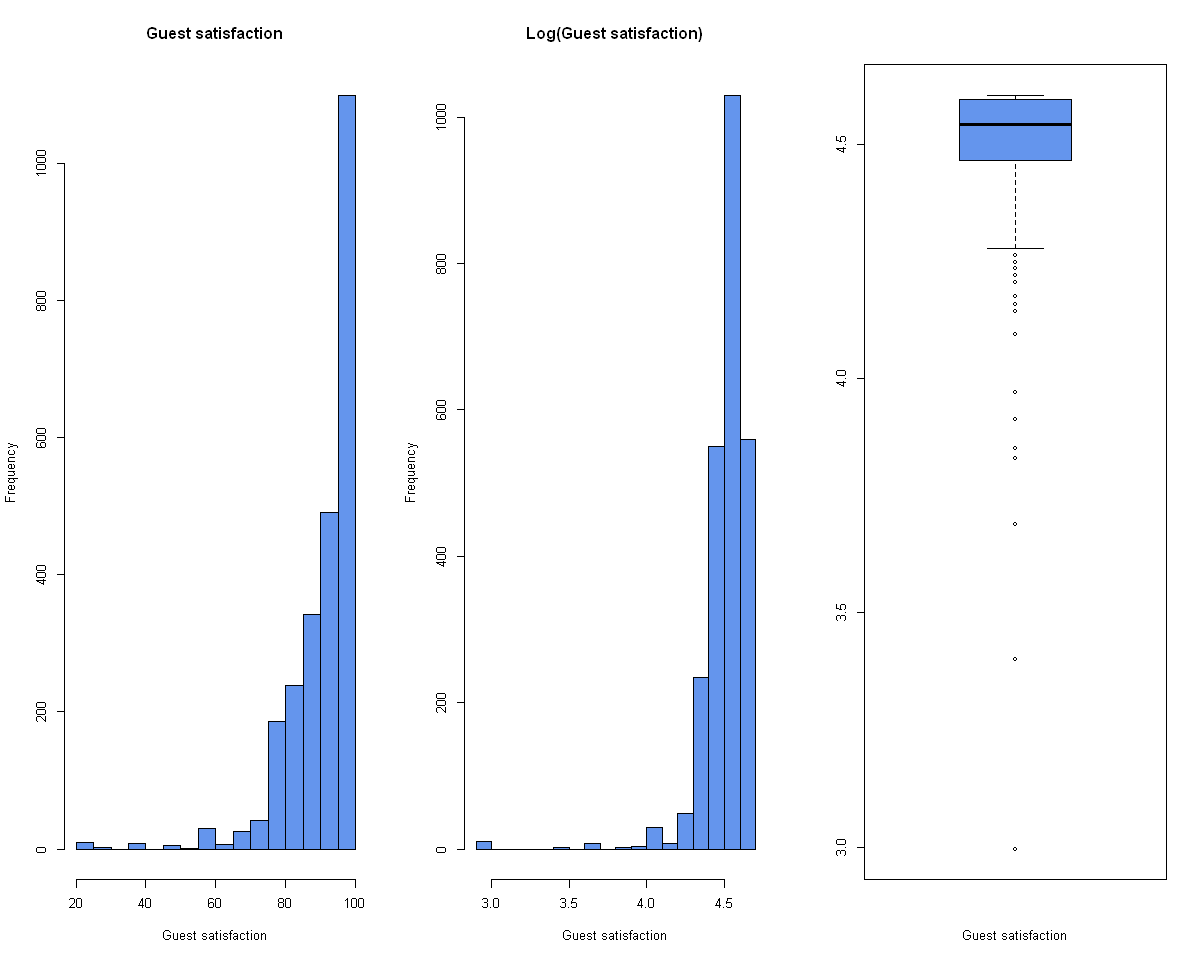

In [13]:
par(mfrow=c(1,3))
library(repr)
options(repr.plot.width = 10, repr.plot.height = 8)

#Guest satisfaction without log()
#Histogram
hist(london_weekday_cleaned$guest_satisfaction_overall, xlab = "Guest satisfaction", col = "cornflowerblue", main = "Guest satisfaction")

#Guest Satisfaction without log()
#Histogram
hist(log(london_weekday_cleaned$guest_satisfaction_overall), xlab = "Guest satisfaction", col = "cornflowerblue", main = "Log(Guest satisfaction)")

#boxplot
boxplot(log(london_weekday_cleaned$guest_satisfaction_overall), xlab = "Guest satisfaction", col = "cornflowerblue")


#### Distance to city, dist

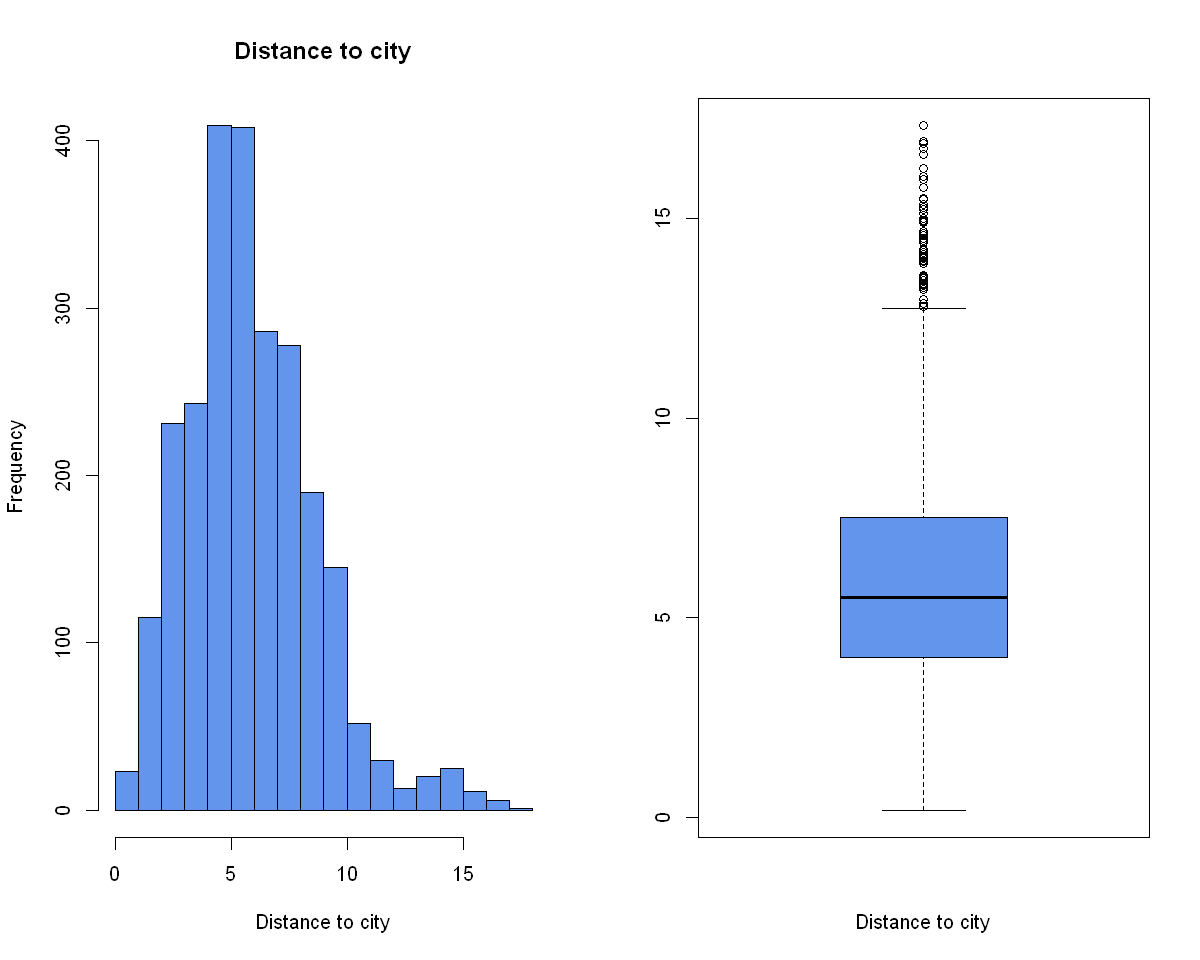

In [14]:
par(mfrow=c(1,2))
library(repr)
options(repr.plot.width = 10, repr.plot.height = 8)
#Distance to city without log()
#Histogram
hist(london_weekday_cleaned$dist, xlab = "Distance to city", col = "cornflowerblue", main = "Distance to city")

#boxplot
boxplot(london_weekday_cleaned$dist, xlab = "Distance to city", col = "cornflowerblue")


#### Distance to metro, metro_dist

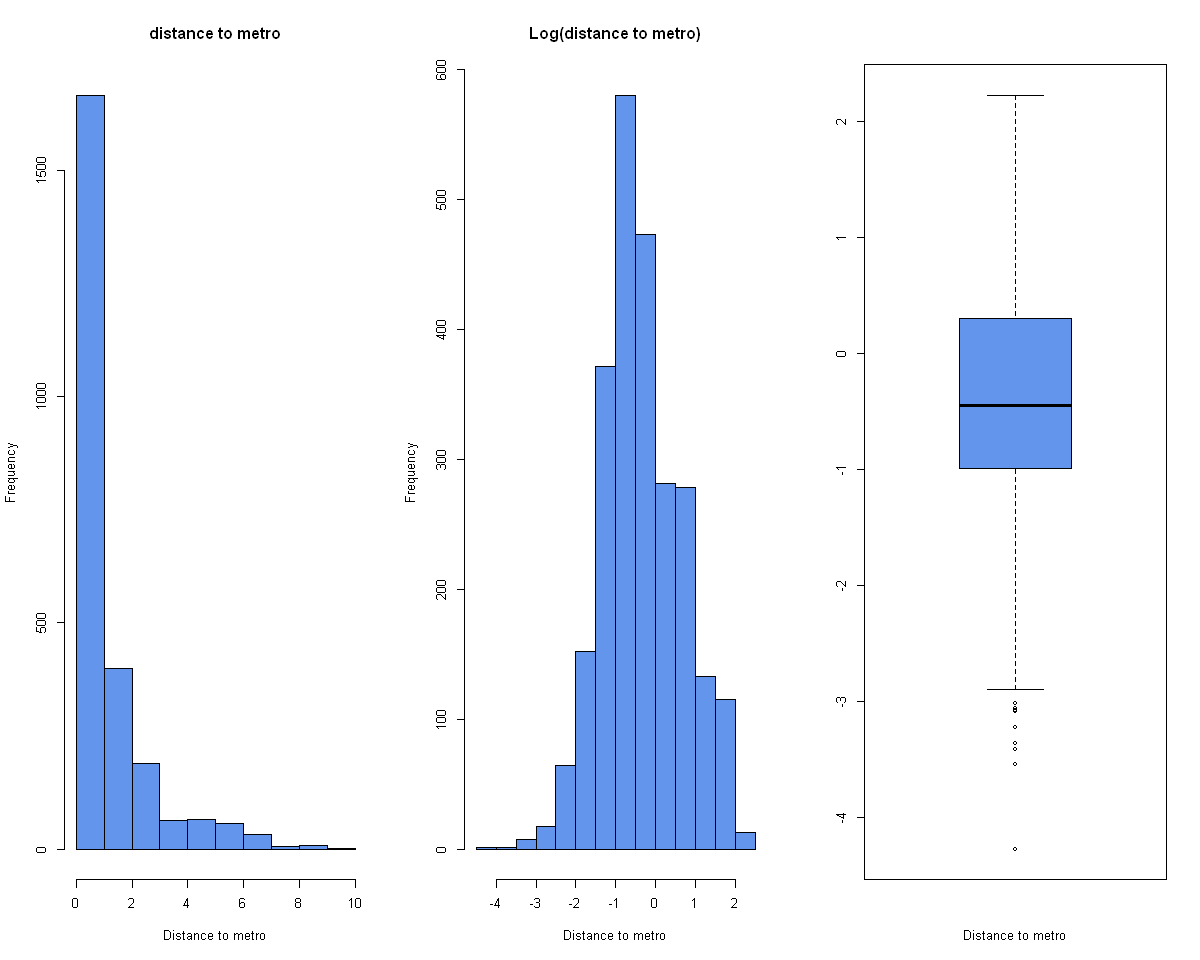

In [15]:
par(mfrow=c(1,3))
library(repr)
options(repr.plot.width = 10, repr.plot.height = 8)
#Distance to metro without log()
#Histogram
hist(london_weekday_cleaned$metro_dist, xlab = "Distance to metro", col = "cornflowerblue", main = "distance to metro")

#Distance to metro with log()
#Histogram
hist(log(london_weekday_cleaned$metro_dist), xlab = "Distance to metro", col = "cornflowerblue", main = "Log(distance to metro)")

#boxplot
boxplot(log(london_weekday_cleaned$metro_dist), xlab = "Distance to metro", col = "cornflowerblue")

We remove distances to metro of <40m, as realistically, a metro station cannot be that close to an airbnb 

In [16]:
london_weekday_cleaned_final <- subset(london_weekday_cleaned, metro_dist >= 0.04)

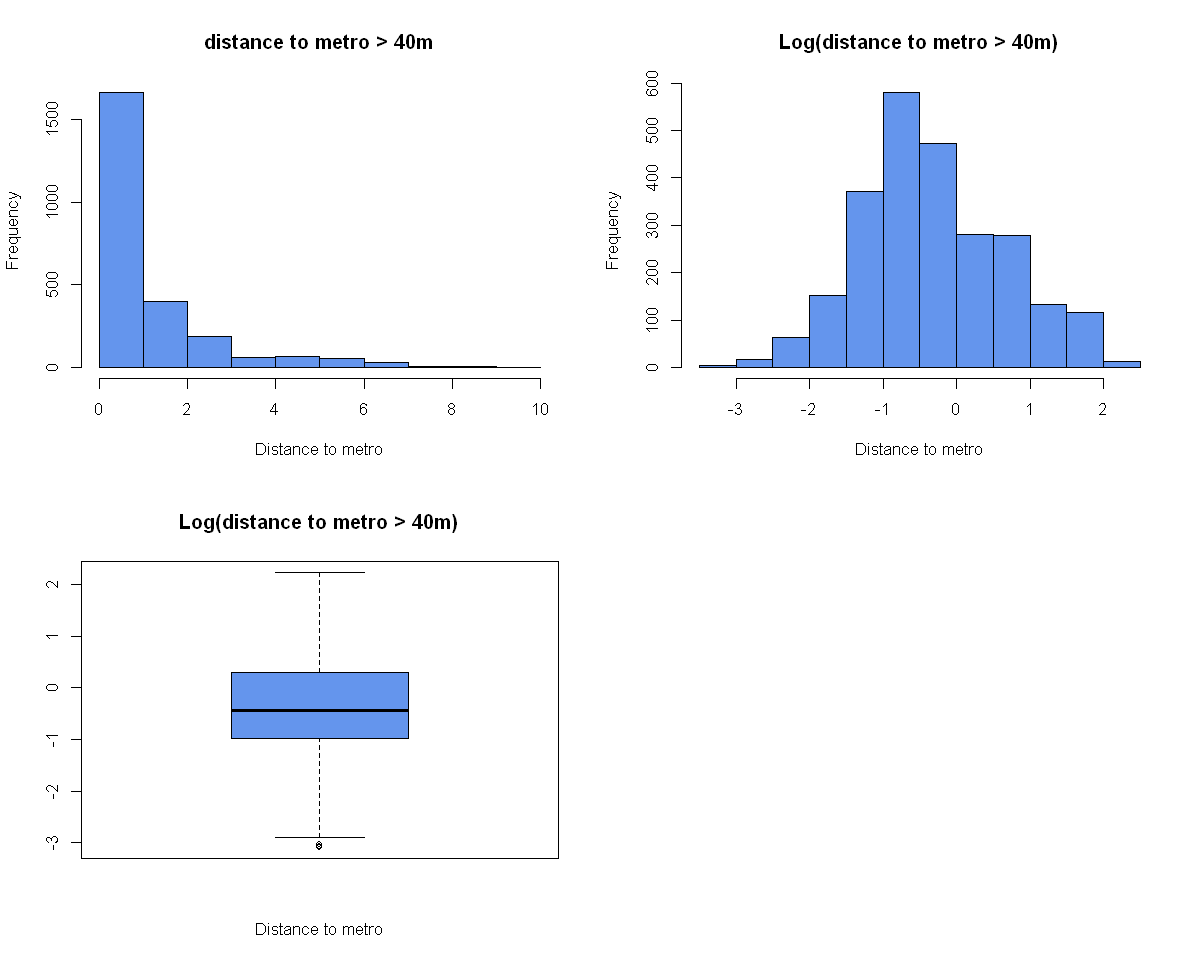

In [23]:
par(mfrow=c(2,2))
library(repr)
options(repr.plot.width = 10, repr.plot.height = 8)
#Distance to metro without log()
#Histogram
hist(london_weekday_cleaned_final$metro_dist, xlab = "Distance to metro", col = "cornflowerblue", main = "distance to metro > 40m")

#Distance to metro with log()
#Histogram
hist(log(london_weekday_cleaned_final$metro_dist), xlab = "Distance to metro", col = "cornflowerblue", main = "Log(distance to metro > 40m)")

#boxplot
boxplot(log(london_weekday_cleaned_final$metro_dist), xlab = "Distance to metro", col = "cornflowerblue",main = "Log(distance to metro > 40m)" )

#### Person Capacity
Majority of the values are 1, so this variable may not be ideal for statistical analysis and is dropped

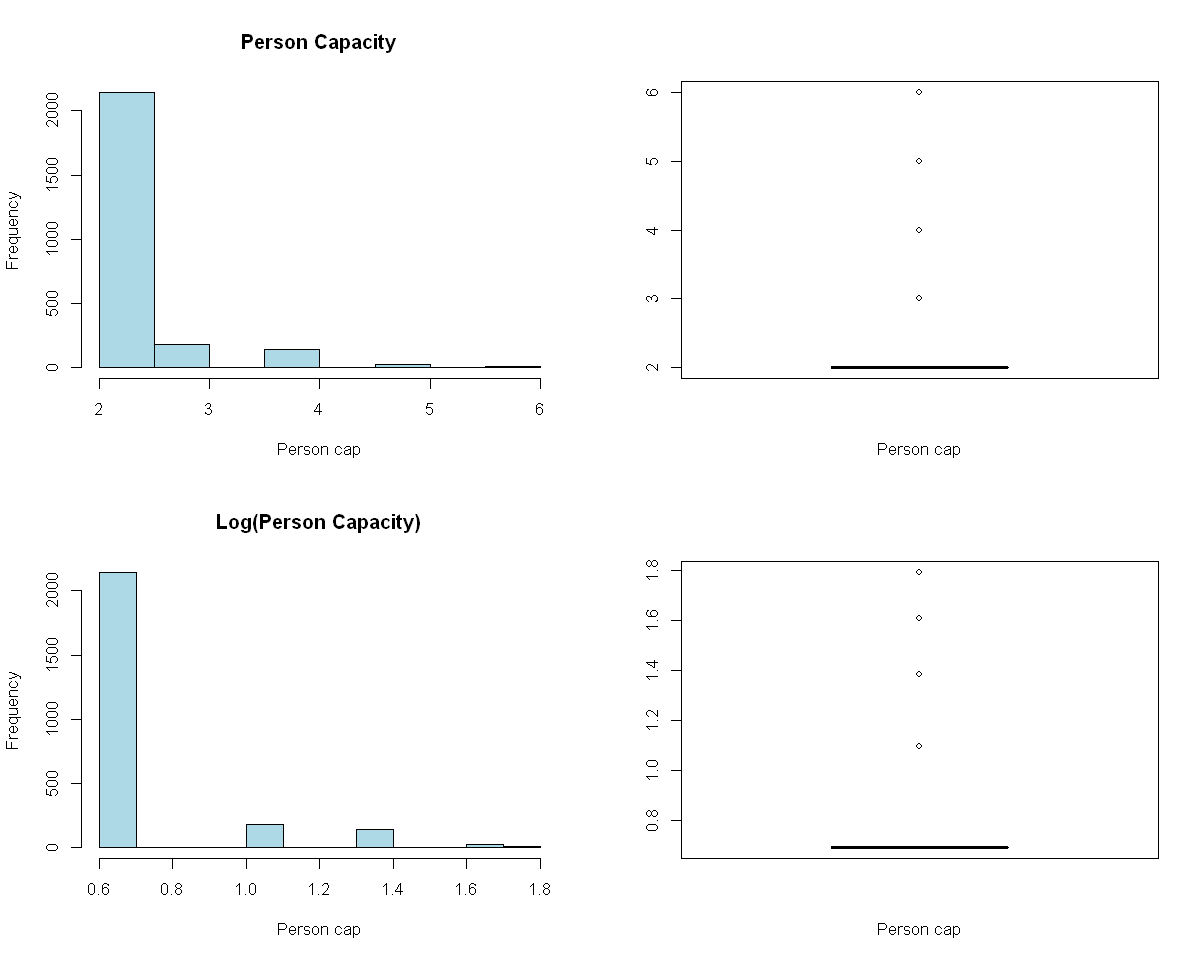

In [18]:
par(mfrow=c(2,2))
#Person capacity without log()
#Histogram
hist(london_weekday_cleaned$person_capacity, xlab = "Person cap", col = "lightblue", main = "Person Capacity")

#boxplot
boxplot(london_weekday_cleaned$person_capacity, xlab = "Person cap", col = "lightblue")

#Person capacity without log()
#Histogram
hist(log(london_weekday_cleaned$person_capacity), xlab = "Person cap", col = "lightblue", main = "Log(Person Capacity)")

#boxplot
boxplot(log(london_weekday_cleaned$person_capacity), xlab = "Person cap", col = "lightblue")

#result not much different, majority is at cap=2, not much comparison ground, thus we wont use this to do any comparison.

### Write cleaned data to csv file|

In [19]:
write.csv(london_weekday_cleaned_final, 'london_weekday_cleaned_final.csv', row.names=FALSE)
#write.csv(london_weekend_cleaned, 'london_weekend_cleaned.csv', row.names=FALSE)

## Appendix

#### Picture in report

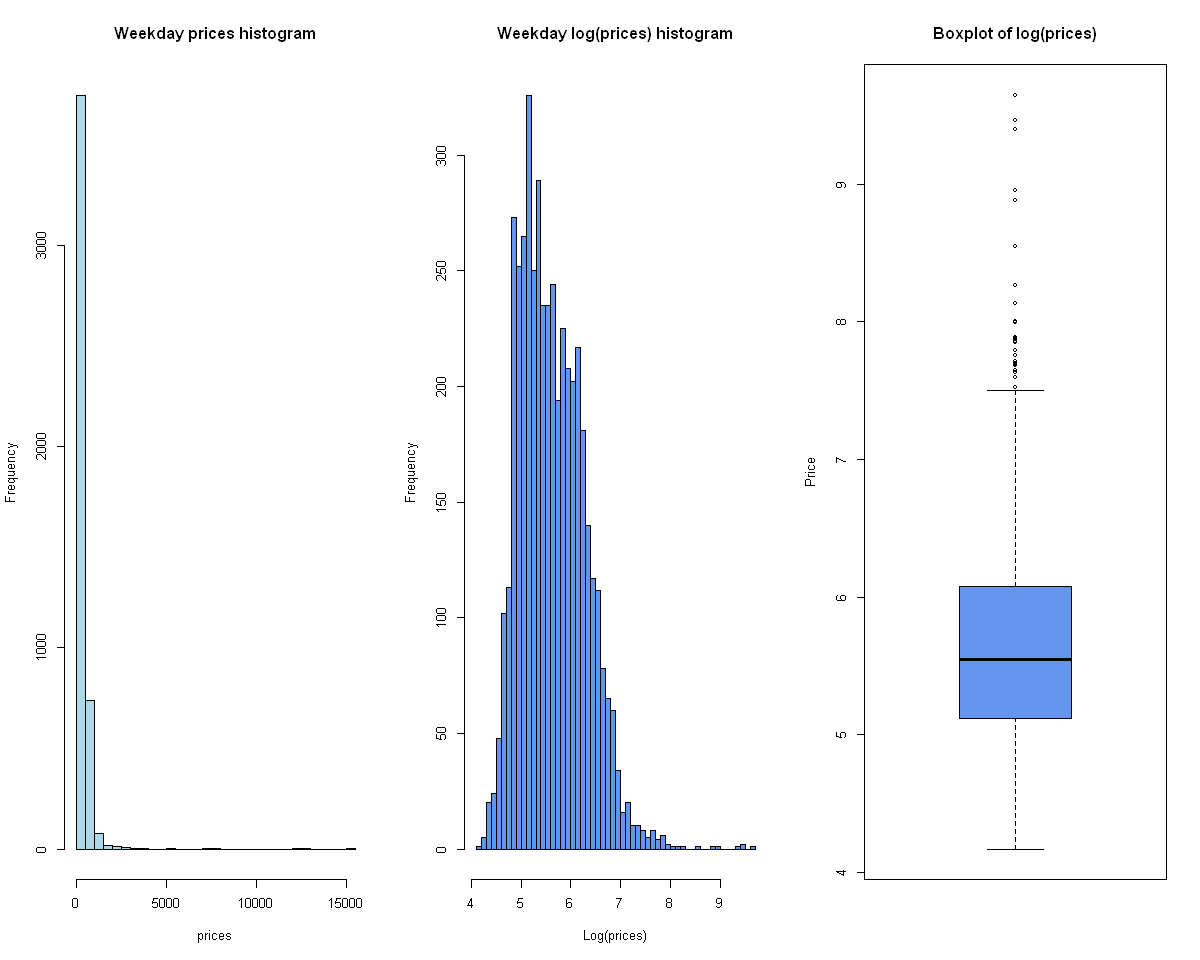

In [20]:
par(mfrow=c(1,3))

#Weekday: Without log transform
price_weekday <- london_weekday$realSum

#Historgram
hist(price_weekday, col = "lightblue"
, xlab = "prices"
, main = 'Weekday prices histogram',breaks=40)

#Histogram
hist(l_price_weekday, col = "cornflowerblue"
, xlab = "Log(prices)"
, main = 'Weekday log(prices) histogram',breaks=40)

#Boxplot
boxplot(l_price_weekday, col = "cornflowerblue", ylab = "Price", main = "Boxplot of log(prices)")


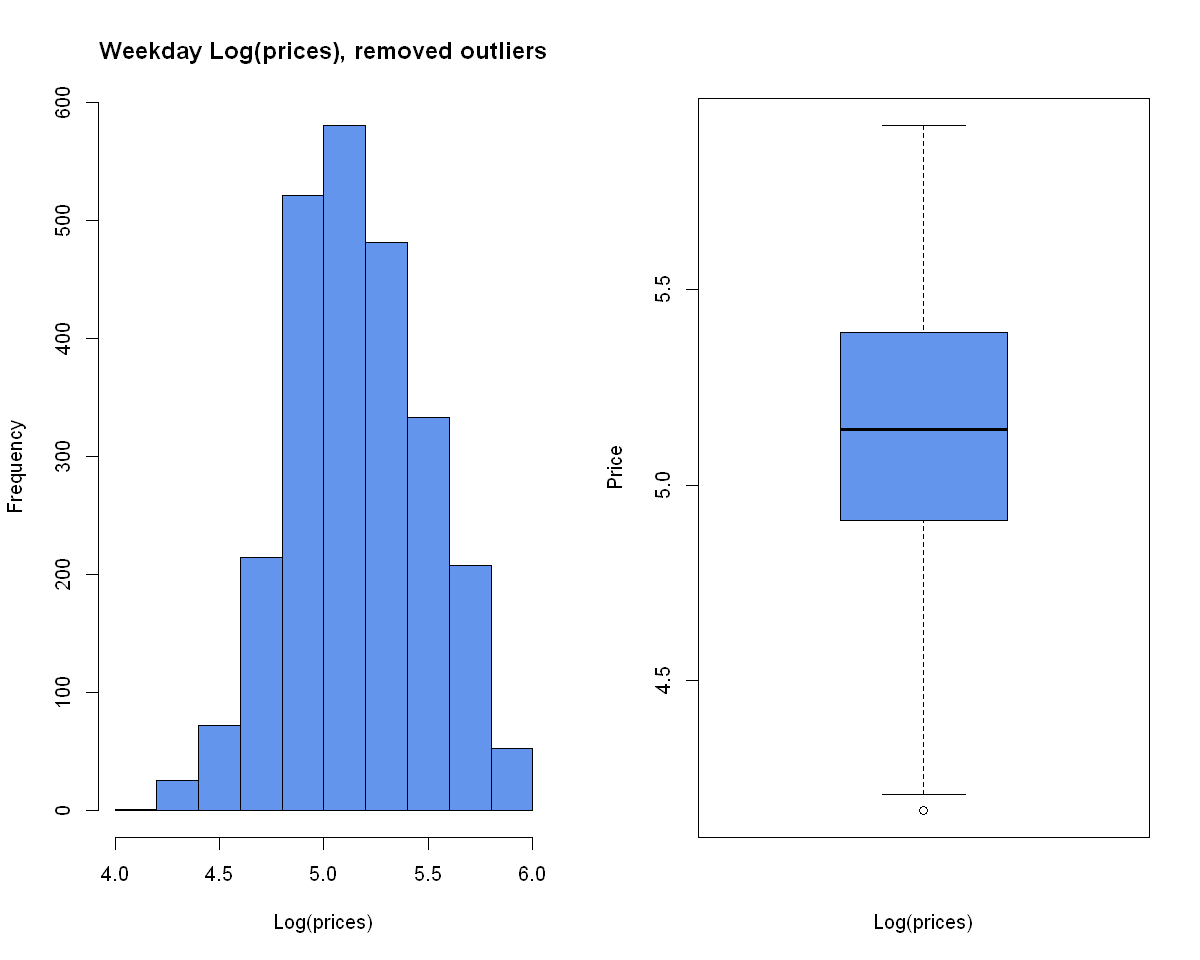

In [21]:
par(mfrow=c(1,2))
#Weekday: With log transform + remove outliers
price_weekday_cleaned <- log(london_weekday_cleaned$realSum)
hist(price_weekday_cleaned, col = "cornflowerblue"
, xlab = "Log(prices)"
, main = 'Weekday Log(prices), removed outliers',breaks=10)

#Boxplot
boxplot(price_weekday_cleaned, col = "cornflowerblue", xlab = "Log(prices)", ylab = "Price" )

In [22]:
summary(price_weekday_cleaned)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.169   4.910   5.144   5.155   5.390   5.920 